In [258]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [259]:
# Load dataset into a dataframe
decantalo = pd.read_csv(r"data\scrapped\decantalo_listings.csv")
decantalo.head()

,rating,num_review,wine_type,size (cL),name,price,country,abv,year,url
0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...
1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...
2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...
3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...
4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...


In [260]:
# Rename the column name for convenience
decantalo.rename(columns={"size (cL)" : "size"}, inplace=True)

In [261]:
# Check types of all variables
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      7259 non-null   float64
 1   num_review  7259 non-null   int64  
 2   wine_type   7259 non-null   object 
 3   size        7128 non-null   float64
 4   name        7259 non-null   object 
 5   price       7259 non-null   object 
 6   country     7216 non-null   object 
 7   abv         7244 non-null   float64
 8   year        6863 non-null   float64
 9   url         7259 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 567.2+ KB


In [262]:
# Check if there are duplicates in the dataframe
dups = decantalo.duplicated()
print(dups.any())
print(decantalo[dups])

True
      rating  num_review             wine_type  size  \
2273     5.0           7                  rose  75.0   
2617     0.0           0  fortified and sherry  75.0   
2711     4.0           1                   red  75.0   
2736     4.3           6                   red  75.0   
7079     0.0           0                orange  75.0   
7080     0.0           0                orange  75.0   

                                     name  price   country   abv    year  \
2273                      Homenaje Rosado   7.08     Spain  13.0  2021.0   
2617                     Niepoort Vintage  71.39  Portugal  19.5  2019.0   
2711               Carmelo Rodero 9 Meses  14.11     Spain  14.0  2021.0   
2736  El Castro de Valtuille Mencía Joven   8.79     Spain  14.0  2021.0   
7079                        Princic Jakot  40.16     Italy  13.0  2019.0   
7080                        Princic Jakot  40.16     Italy  13.0  2019.0   

                                                    url  
2273  https

In [263]:
# Drop the duplicate rows
print(decantalo.shape)
decantalo.drop_duplicates(inplace=True)
print(decantalo.shape)

(7259, 10)
(7253, 10)


In [264]:
# Check for na values
decantalo.isna().any()

rating        False
num_review    False
wine_type     False
size           True
name          False
price         False
country        True
abv            True
year           True
url           False
dtype: bool

In [265]:
# Count NA values
decantalo.isna().sum()

rating          0
num_review      0
wine_type       0
size          131
name            0
price           0
country        43
abv            15
year          396
url             0
dtype: int64

In [266]:
# Check number of unique values in all columns
decantalo.nunique()

rating          19
num_review      43
wine_type        7
size             4
name          6498
price         1533
country         21
abv             96
year            25
url           7247
dtype: int64

array([4.9, 4.8, 5. , 4.4, 0. , 4.7, 4.5, 4.2, 4.6, 4. , 3. , 3.5, 3.8,
       4.3, 2. , 4.1, 1. , 3.7, 3.9])

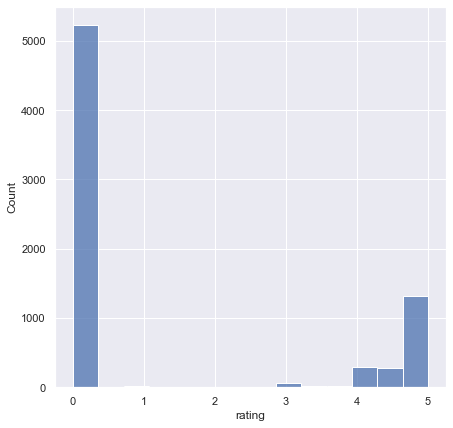

In [284]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["rating"])
decantalo["rating"].unique()

array([52, 26, 15,  2,  6, 23, 25,  8, 14,  0,  7, 11,  9,  1, 18,  3, 34,
        4, 16, 12,  5, 19, 13, 10, 21, 17, 27, 31, 47, 44, 22, 35, 78, 94,
       57, 30, 73, 33, 40, 20, 24, 38, 50], dtype=int64)

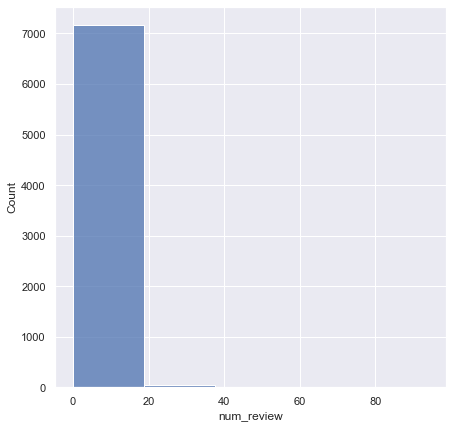

In [285]:
# Histogram plots for number of reviews
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["num_review"], kde=False, bins=5)
decantalo["num_review"].unique()

array(['white', 'rose', 'fortified and sherry', 'red', 'sweet', 'orange',
       'vermouth'], dtype=object)

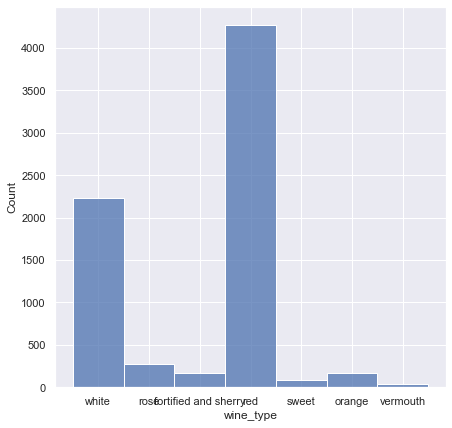

In [286]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["wine_type"])
decantalo["wine_type"].unique()

array([75., 50., 62., 70.])

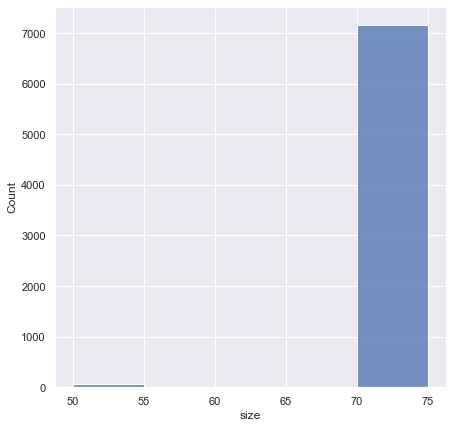

In [287]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["size"], kde=False, bins=5)
decantalo["size"].unique()

In [288]:
# As info showed that price is of type object, it indicates there might be non-numerical values in it. 
# Converting the column to float and any non numeric value to Nan. We will handle Nan later
decantalo["price"] = decantalo["price"].apply(pd.to_numeric, errors = "coerce")
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7237 entries, 0 to 7236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        7237 non-null   int64  
 1   rating       7237 non-null   float64
 2   num_review   7237 non-null   int64  
 3   wine_type    7237 non-null   object 
 4   size         7237 non-null   float64
 5   name         7237 non-null   object 
 6   price        5813 non-null   float64
 7   country      7237 non-null   object 
 8   abv          7237 non-null   float64
 9   year         6849 non-null   float64
 10  url          7237 non-null   object 
 11  age          6849 non-null   float64
 12  score        7237 non-null   float64
 13  scaledprice  5813 non-null   float64
 14  logprice     5813 non-null   float64
 15  countrycode  7237 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory usage: 904.8+ KB


In [289]:
# Fix missing countries to unknown value
decantalo["country"].fillna("unknown" , inplace=True)
decantalo["country"].unique()

array(['Spain', 'France', 'Portugal', 'Italy', 'Germany', 'Argentina',
       'Greece', 'unknown', 'South Africa', 'Austria', 'Hungary',
       'Slovenia', 'Chile', 'New Zealand', 'Croatia', 'United States',
       'Australia', 'Peru', 'Uruguay', 'Lebanon', 'Israel',
       'Czech Republic'], dtype=object)

<AxesSubplot:xlabel='abv', ylabel='Count'>

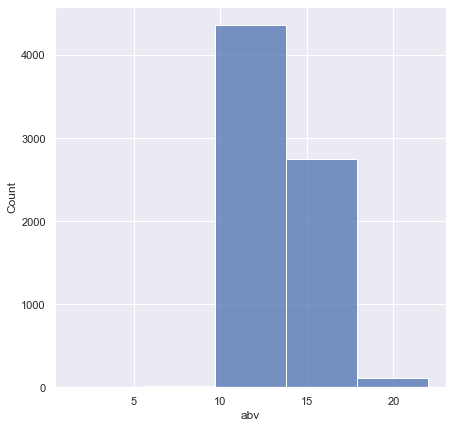

In [291]:
# Histogram plot of ABV

sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["abv"], kde=False,bins=5)



In [292]:
decantalo.describe()
# max value of abv doesn't make sense 
# DRopping abv values above 100

indices = decantalo[decantalo["abv"] > 100].index
decantalo.drop(indices, inplace=True)

# checking if the value is removed
decantalo.describe()

# Compute % of missing values
decantalo["abv"].isna().sum()/len(decantalo["abv"])*100

# As the % of missing values is very small, we will drop the rows having abv value as NA
decantalo.dropna(subset = ["abv"], inplace=True)

decantalo["abv"].isna().sum()




0

<AxesSubplot:xlabel='year', ylabel='Count'>

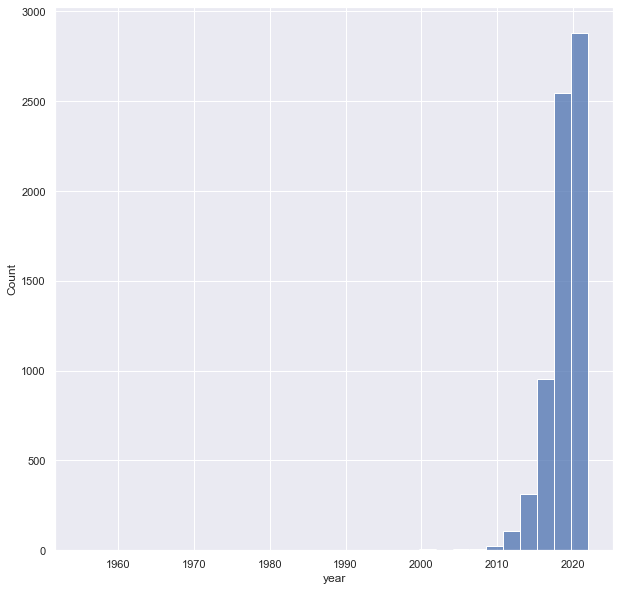

In [293]:
# Histogram plot of year

decantalo["year"].isna().sum()/len(decantalo["year"])*100
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(decantalo["year"], bins=30)

# As only 5% is missing, we will keep it as is and can use other column values for analysis 






In [294]:
# Feature Engineering

decantalo = decantalo.reset_index()

# Find age
decantalo.loc[:, "age"] = 2022 - decantalo["year"]

# # one hot encoding of wine_type (after merge)
# pd.get_dummies(decantalo, drop_first=True, columns=["wine_type"])

# Creating a column with ratings >5
for i, num in enumerate(decantalo["num_review"]):
    if num > 5:
        decantalo.loc[i, "score"] = decantalo.loc[i, "rating"]
    else:
        decantalo.loc[i, "score"] = 0




In [303]:
# Impute size to most frequent value

impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
decantalo[["size"]]=impute.fit_transform(decantalo[["size"]])


# To scale size
for i, size in enumerate(decantalo["size"]):
    decantalo.loc[i, "scaledprice"] = decantalo.loc[i, "price"] * 75 / size

decantalo.loc[decantalo["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
decantalo.loc[:, "logprice"] = np.log10(decantalo.loc[:,"scaledprice"])





c:\Users\Soumya\anaconda3\Anaconda\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [296]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

decantalo["countrycode"] = [countries.get(c, "unknown") for c in decantalo["country"]]
decantalo.head()

,level_0,index,rating,num_review,wine_type,size,name,price,country,abv,year,url,age,score,scaledprice,logprice,countrycode
0,0,0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...,1.0,4.9,10.55,1.023252,ESP
1,1,1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...,1.0,4.8,11.33,1.054230,ESP
2,2,2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...,1.0,4.8,10.85,1.035430,ESP
3,3,3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...,1.0,0.0,13.64,1.134814,ESP
4,4,4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...,1.0,4.8,13.73,1.137671,ESP


<AxesSubplot:>

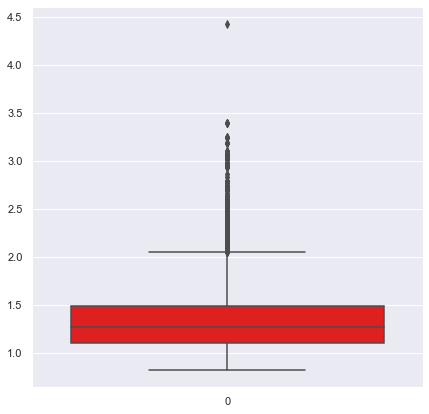

In [304]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(7,7)})

sns.boxplot(data=np.log10(decantalo["scaledprice"]), color= "red")


<AxesSubplot:xlabel='Count', ylabel='country'>

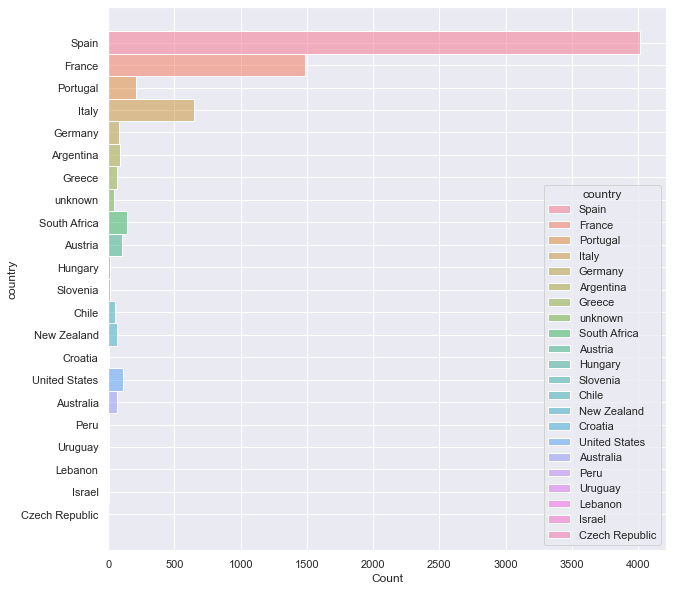

In [280]:
# Countries visualisation
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=decantalo, y="country", hue="country")


<AxesSubplot:xlabel='wine_type', ylabel='logprice'>

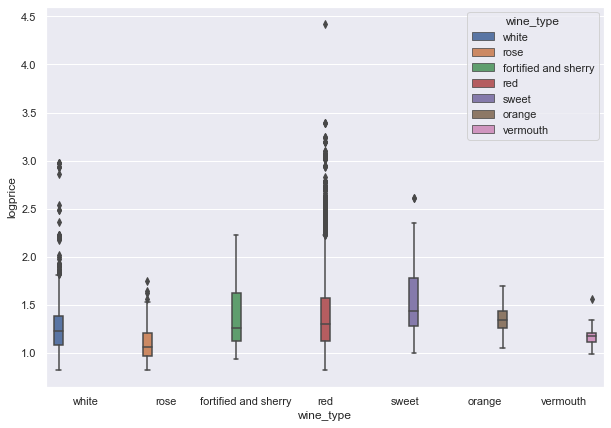

In [305]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=decantalo,
    x="wine_type", y="logprice", hue="wine_type"
)

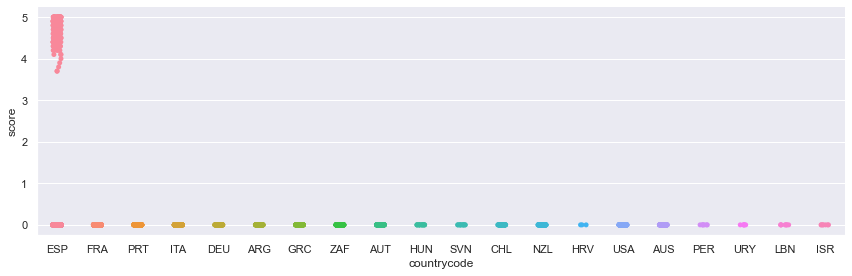

In [282]:
# plot country vs review ratings

sns.catplot(data=decantalo.loc[decantalo["countrycode"]!="unknown"], x="countrycode", y="score", height=4, aspect=3)

Text(0.5, 0, 'LogPrice')

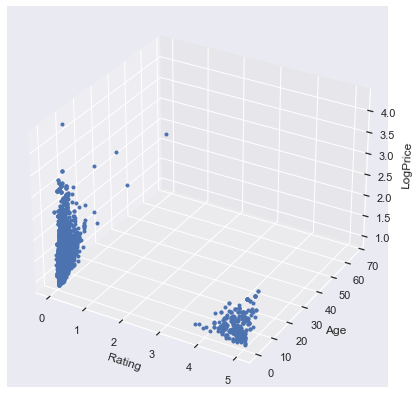

In [314]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(decantalo["score"], decantalo["age"], decantalo["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")